# Visualisation on Surface

The dependencies for this notebook are a bit more complicated, because VTK which is needed for visualisations cannot be easily integrated into the virtual environment. The below analyses were run using Anaconda

### import modules

In [1]:
import os
import numpy as np

from surfer import Brain, Surface, project_volume_data

from mayavi import mlab
mlab.init_notebook()

import matplotlib.pylab as plt
import seaborn as sns
sns.set_style('dark')
%matplotlib inline

Notebook initialized with x3d backend.


### preprocessing with Freesurfer

recon-all on the SPM-Normalized structural image (not provided), which is in alignment with all the functional data

In [2]:
#%%bash
#
#recon-all -all -i ../data/wmpr.nii -s dnMniBrain
#

Inflate the Brain, so we can see more of it in a single view

In [3]:
#cwd = os.getcwd()

In [4]:
#%%bash
#
#cd $FREESURFER_HOME/subjects/dnMniBrain/
#
#mris_inflate -n 15 rh.pial rh.pial.15more
#mris_inflate -n 15 lh.pial lh.pial.15more
#

In [5]:
#os.system('cd %s'%cwd)

Create the reg-File which allows to map the functional volumes onto the surface

Usage of bbregister:  
- --s: name of subject in freesurfer folder
- -- mov: the file that is registered to be in alignment with the structural data
- --reg: name of the file we create, which contains the realignment parameters
- --inti-coreg: use freesurfer coregistration (we can also use fsl or spm)
- --bold: what modality is the picture we want to realign

In [6]:
#%%bash
#
#bbregister --s dnMniBrain --mov ../data/wrrun000.nii.gz --reg ../data/wrrun000Reg.dat --init-coreg --bold 

## Plot Results using PySurfer  

https://pysurfer.github.io

### fuction to get rid of white space

In [7]:
# crop image (taken from https://github.com/mwaskom/Waskom_CerebCortex_2017/blob/master/dimensionality_reduction.ipynb)
def crop(arr):
    x, y = np.argwhere((arr != 255).any(axis=-1)).T
    return arr[x.min() - 20:x.max() + 20, y.min() - 20:y.max() + 20, :]

### settings for the 4 different perspectives

In [8]:
d = {}
d['left'] = dict(azimuth=180, elevation=90,focalpoint=[0, 0,0])
d['right'] = dict(azimuth=0, elevation=90,focalpoint=[0, 0,0])
d['ventral'] = dict(azimuth=0, elevation=180,focalpoint=[0, 0,-150])
d['dorsal'] = dict(azimuth=0, elevation=0,focalpoint=[0,0,0])

In [9]:
reg_file = os.path.join("../data/wrrun000Reg.dat")

### Inflated Mean Training Data

In [44]:
for cond,myMin in zip(['faces','movements','places','words','rest'],
                      [0.08,0.22,0.14,0.08,0.06]):

    thisMap = '../meanTraining/meanCond_%s.nii.gz'%cond

    surf_data_lh = project_volume_data(thisMap,'lh', reg_file,smooth_fwhm=8)
    surf_data_rh = project_volume_data(thisMap,'rh', reg_file,smooth_fwhm=8)
    surfDict = {'lh':surf_data_lh,'rh':surf_data_rh}
    
    fig = plt.figure( figsize=(16,3) )

    for i,(h,view,s) in enumerate( zip(['lh','rh','lh','rh'],
                          ['left','right','right','left'],
                          [1000,1000,(1300,1000),(1300,1000)]) ):

        ax = plt.subplot(1,6,i+1)
        b = Brain('dnMniBrain', h, 'inflated.15more',background='white',size=s)
        
        b.add_overlay(surfDict[h], min=myMin, max=1, hemi=h)
        b.hide_colorbar()
        
        b.show_view(d[view])
        
        ax.imshow( b.screenshot() ); ax.set_xticks([]);ax.set_yticks([]);


    ################
    ax = plt.subplot(1,6,5)

    b = Brain('dnMniBrain', 'both', 'inflated.15more',background='white',size=1000)
    for h in ['lh','rh']:
        
        b.add_overlay(surfDict[h], min=myMin, max=1, hemi=h)
        b.hide_colorbar()

    b.show_view(d['dorsal'])
    ax.imshow( crop(b.screenshot()) ); ax.set_xticks([]);ax.set_yticks([]);

    ################
    ax = plt.subplot(1,6,6)

    b = Brain('dnMniBrain', 'both', 'inflated.15more',background='white',size=(1440,1000))
    for h in ['lh','rh']:
        
        b.add_overlay(surfDict[h], min=myMin, max=1, hemi=h)
        b.hide_colorbar()

    b.show_view(d['ventral'])
    ax.imshow(crop(b.screenshot()) ); ax.set_xticks([]);ax.set_yticks([]);

    plt.suptitle(cond,fontsize=22)
    plt.tight_layout()
    
    plt.savefig('../surfFigs/meanInflated15Plot_%s.png'%cond,dpi=300,bbox_inches='tight')

    plt.close()

mri_vol2surf --mov ../meanTraining/meanCond_faces.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2syyq58v.mgz
mri_vol2surf --mov ../meanTraining/meanCond_faces.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2ssbnGYl.mgz
mri_vol2surf --mov ../meanTraining/meanCond_movements.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sjFQ3Yc.mgz
mri_vol2surf --mov ../meanTraining/meanCond_movements.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sI3XEat.mgz
mri_vol2surf --mov ../meanTraining/meanCond_places.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sxwi2_Z.mgz
mri_vol2surf --mov ../meanTraining/meanCond_places.nii.gz --hemi rh --surf white --reg ../data/w

In [45]:
from PIL import Image

In [46]:
figList = ['../surfFigs/%s'%x for x in os.listdir('../surfFigs/') if x.startswith('meanInflated15')]

In [47]:
figList

['../surfFigs/meanInflated15Plot_faces.png',
 '../surfFigs/meanInflated15Plot_movements.png',
 '../surfFigs/meanInflated15Plot_places.png',
 '../surfFigs/meanInflated15Plot_rest.png',
 '../surfFigs/meanInflated15Plot_words.png']

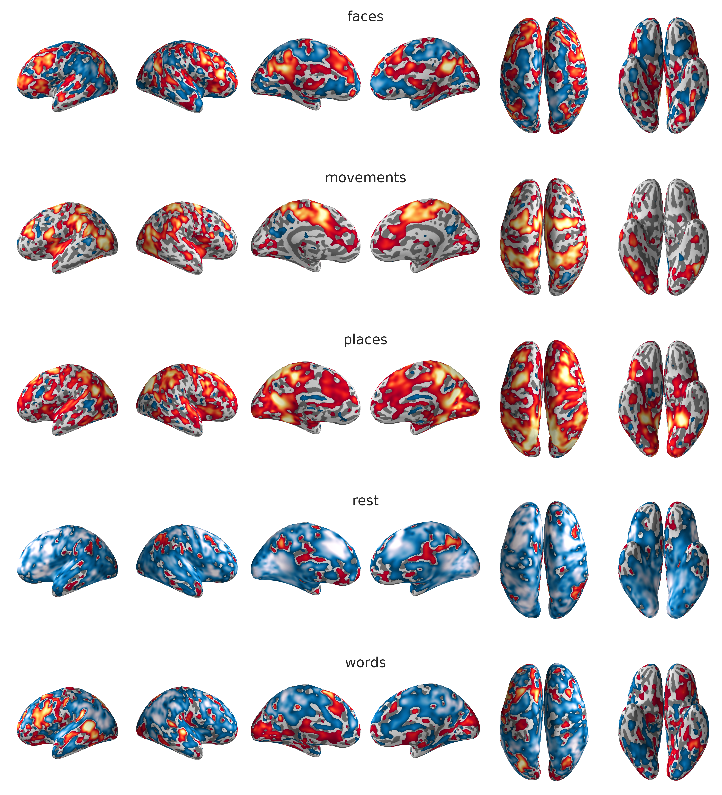

In [48]:
fig = plt.figure(figsize=(16,14))
for i,im in enumerate(figList):
    ax = plt.subplot(5,1,i+1)
    ax.imshow( Image.open(im) )
    ax.set_xticks([]);ax.set_yticks([])
    sns.despine(left=True,bottom=True)
plt.savefig('../figs/meanTrainBrains.png',dpi=600,bbox_inches='tight')
plt.show()

### Inflated Test Blocks

In [30]:
testList = ['../test/%s'%x for x in os.listdir('../test/') ]
testList.sort()

In [31]:
testList

['../test/faces_051_movieactors.nii.gz',
 '../test/faces_058_athletes.nii.gz',
 '../test/faces_064_family.nii.gz',
 '../test/faces_067_friends.nii.gz',
 '../test/faces_074_politicians.nii.gz',
 '../test/movements_055_badminton.nii.gz',
 '../test/movements_060_swimming.nii.gz',
 '../test/movements_065_badminton.nii.gz',
 '../test/movements_070_tennis.nii.gz',
 '../test/movements_075_climbing.nii.gz',
 '../test/places_054_market.nii.gz',
 '../test/places_059_school.nii.gz',
 '../test/places_063_citysquare.nii.gz',
 '../test/places_068_market.nii.gz',
 '../test/places_071_church.nii.gz',
 '../test/rest_053_rest.nii.gz',
 '../test/rest_057_rest.nii.gz',
 '../test/rest_061_rest.nii.gz',
 '../test/rest_069_rest.nii.gz',
 '../test/rest_072_rest.nii.gz',
 '../test/words_052_countries.nii.gz',
 '../test/words_056_animals.nii.gz',
 '../test/words_062_animals.nii.gz',
 '../test/words_066_tools.nii.gz',
 '../test/words_073_fruit.nii.gz']

In [32]:
myMins = [0.2,0.2,0.3,0.3,0.2]

for cond in ['words']:

    imList = [x for x in testList if cond in x]
    
    fig = plt.figure( figsize=(16,3) )
    
    for i,im in enumerate(imList):
        
        surf_data_lh = project_volume_data(im,'lh', reg_file,smooth_fwhm=8)
        
        surfDict = {'lh':surf_data_lh}

        ax = plt.subplot(1,5,i+1)

        b = Brain('dnMniBrain', 'both', 'inflated.15more',background='white',size=1000)
        
        for h in ['lh']:
            
            b.add_overlay(surfDict[h], min=myMins[i], max=1, hemi=h)

        b.hide_colorbar()
        b.show_view(d['left'])

        ax.imshow( b.screenshot() ); ax.set_xticks([]); ax.set_yticks([]);
        
        num = im.split('_')[-2]
        name = im.split('_')[-1].split('.')[0]
        
        axName = '%s %s'%(num,name)
        
        ax.set_title(axName ,fontsize=18 )

    plt.tight_layout()
    plt.savefig('../surfFigs/testInflated15Plot_%s.png'%cond,dpi=300,bbox_inches='tight')

    plt.close()

mri_vol2surf --mov ../test/words_052_countries.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2siWxfLf.mgz
mri_vol2surf --mov ../test/words_056_animals.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sfk_ifA.mgz
mri_vol2surf --mov ../test/words_062_animals.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sfioeK3.mgz
mri_vol2surf --mov ../test/words_066_tools.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2s038T4M.mgz
mri_vol2surf --mov ../test/words_073_fruit.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sdTpRxx.mgz


In [33]:
myMins = [0.3,0.3,0.5,0.3,0.5]
for cond in ['movements']:#['faces','movements','places','words','rest']:
    
    imList = [x for x in testList if cond in x]
    
    fig = plt.figure( figsize=(16,3) )
    
    for i,im in enumerate(imList):
        
        surf_data_lh = project_volume_data(im,'lh', reg_file,smooth_fwhm=8)
        surf_data_rh = project_volume_data(im,'rh', reg_file,smooth_fwhm=8)
        
        surfDict = {'lh':surf_data_lh,'rh':surf_data_rh}

        ax = plt.subplot(1,5,i+1)

        b = Brain('dnMniBrain', 'both', 'inflated.15more',background='white',size=1000)
        
        for h in ['lh','rh']:
            
            b.add_overlay(surfDict[h], min=myMins[i], max=2, hemi=h)

        b.hide_colorbar()
        b.show_view(d['dorsal'])

        ax.imshow( crop(b.screenshot()) ); ax.set_xticks([]);ax.set_yticks([]);
        
        num = im.split('_')[-2]
        name = im.split('_')[-1].split('.')[0]
        
        axName = '%s %s'%(num,name)
        
        ax.set_title(axName ,fontsize=18 )

    plt.tight_layout()
    plt.savefig('../surfFigs/testInflated15Plot_%s.png'%cond,dpi=300,bbox_inches='tight')

    plt.close()

mri_vol2surf --mov ../test/movements_055_badminton.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2stEx7cj.mgz
mri_vol2surf --mov ../test/movements_055_badminton.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sH_NTJ2.mgz
mri_vol2surf --mov ../test/movements_060_swimming.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sH1fbje.mgz
mri_vol2surf --mov ../test/movements_060_swimming.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2s5A1Z2B.mgz
mri_vol2surf --mov ../test/movements_065_badminton.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sBf1mEG.mgz
mri_vol2surf --mov ../test/movements_065_badminton.nii.gz --hemi rh --surf white --reg ../data/wrrun00

In [34]:
myMins = [0.4,0.3,0.3,0.4,0.3]

for cond in ['places']:

    imList = [x for x in testList if cond in x]
    
    fig = plt.figure( figsize=(16,3) )
    
    for i,im in enumerate(imList):
        
        surf_data_lh = project_volume_data(im,'lh', reg_file,smooth_fwhm=8)
        surf_data_rh = project_volume_data(im,'rh', reg_file,smooth_fwhm=8)
        
        surfDict = {'lh':surf_data_lh,'rh':surf_data_rh}

        ax = plt.subplot(1,5,i+1)

        b = Brain('dnMniBrain', 'both', 'inflated.15more',background='white',size=1000)
        
        for h in ['lh','rh']:
            
            b.add_overlay(surfDict[h], min=myMins[i], max=2, hemi=h)

        b.hide_colorbar()
        b.show_view(d['ventral'])

        ax.imshow( crop(b.screenshot()) ); ax.set_xticks([]);ax.set_yticks([]);
        
        num = im.split('_')[-2]
        name = im.split('_')[-1].split('.')[0]
        
        axName = '%s %s'%(num,name)
        
        ax.set_title(axName ,fontsize=18 )

    plt.tight_layout()
    plt.savefig('../surfFigs/testInflated15Plot_%s.png'%cond,dpi=300,bbox_inches='tight')

    plt.close()

mri_vol2surf --mov ../test/places_054_market.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sPMqrJz.mgz
mri_vol2surf --mov ../test/places_054_market.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sD7diL4.mgz
mri_vol2surf --mov ../test/places_059_school.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2slqUSiZ.mgz
mri_vol2surf --mov ../test/places_059_school.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sxS4isR.mgz
mri_vol2surf --mov ../test/places_063_citysquare.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sXP2QWX.mgz
mri_vol2surf --mov ../test/places_063_citysquare.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 

In [35]:
myMins = [0.2,0.2,0.2,0.2,0.2]

for cond in ['faces']:

    imList = [x for x in testList if cond in x]
    
    fig = plt.figure( figsize=(16,3) )
    
    for i,im in enumerate(imList):
        
        surf_data_lh = project_volume_data(im,'lh', reg_file,smooth_fwhm=8)
        surf_data_rh = project_volume_data(im,'rh', reg_file,smooth_fwhm=8)
        
        surfDict = {'lh':surf_data_lh,'rh':surf_data_rh}

        ax = plt.subplot(1,5,i+1)

        b = Brain('dnMniBrain', 'both', 'inflated.15more',background='white',size=1000)
        
        for h in ['lh','rh']:
            
            b.add_overlay(surfDict[h], min=myMins[i], max=2, hemi=h)

        b.hide_colorbar()
        b.show_view(d['ventral'])

        ax.imshow( crop(b.screenshot()) ); ax.set_xticks([]);ax.set_yticks([]);
        
        num = im.split('_')[-2]
        name = im.split('_')[-1].split('.')[0]
        
        axName = '%s %s'%(num,name)
        
        ax.set_title(axName ,fontsize=18 )

    plt.tight_layout()
    plt.savefig('../surfFigs/testInflated15Plot_%s.png'%cond,dpi=300,bbox_inches='tight')

    plt.close()

mri_vol2surf --mov ../test/faces_051_movieactors.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sjUrmnh.mgz
mri_vol2surf --mov ../test/faces_051_movieactors.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sf9ILiz.mgz
mri_vol2surf --mov ../test/faces_058_athletes.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sdzIkk5.mgz
mri_vol2surf --mov ../test/faces_058_athletes.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2soB5hIj.mgz
mri_vol2surf --mov ../test/faces_064_family.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sqA5yd9.mgz
mri_vol2surf --mov ../test/faces_064_family.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 

In [36]:
myMins = [0.2,0.2,0.2,0.2,0.3]

for cond in ['rest']:

    imList = [x for x in testList if cond in x]
    
    fig = plt.figure( figsize=(16,3) )
    
    for i,im in enumerate(imList):
        
        surf_data_rh = project_volume_data(im,'rh', reg_file,smooth_fwhm=8)
        
        surfDict = {'rh':surf_data_rh}

        ax = plt.subplot(1,5,i+1)

        b = Brain('dnMniBrain', 'rh', 'inflated.15more',background='white',size=1000)
        
        for h in ['rh']:
            
            b.add_overlay(surfDict[h], min=myMins[i], max=1, hemi=h)

        b.hide_colorbar()
        b.show_view(d['left'])

        ax.imshow( b.screenshot() ); ax.set_xticks([]);ax.set_yticks([]);
        
        num = im.split('_')[-2]
        name = im.split('_')[-1].split('.')[0]
        
        axName = '%s %s'%(num,name)
        
        ax.set_title(axName ,fontsize=18 )

    plt.tight_layout()
    plt.savefig('../surfFigs/testInflated15Plot_%s.png'%cond,dpi=300,bbox_inches='tight')

    plt.close()

mri_vol2surf --mov ../test/rest_053_rest.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sAM4HMn.mgz
mri_vol2surf --mov ../test/rest_057_rest.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2svBBqpY.mgz
mri_vol2surf --mov ../test/rest_061_rest.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sxk_Wod.mgz
mri_vol2surf --mov ../test/rest_069_rest.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sImhPWt.mgz
mri_vol2surf --mov ../test/rest_072_rest.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2s9ZETsN.mgz


In [37]:
figList = ['../surfFigs/%s'%x for x in os.listdir('../surfFigs/') if x.startswith('testInflated15')]
figList

['../surfFigs/testInflated15Plot_faces.png',
 '../surfFigs/testInflated15Plot_movements.png',
 '../surfFigs/testInflated15Plot_places.png',
 '../surfFigs/testInflated15Plot_rest.png',
 '../surfFigs/testInflated15Plot_words.png']

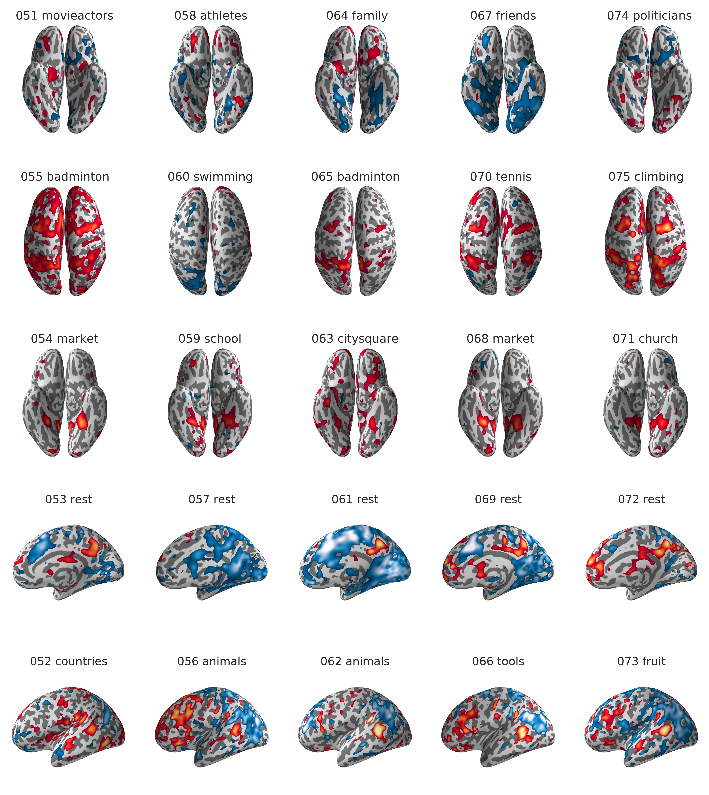

In [38]:
fig = plt.figure(figsize=(16,14))
for i,im in enumerate(figList):
    ax = plt.subplot(5,1,i+1)
    ax.imshow( Image.open(im) )
    ax.set_xticks([]);ax.set_yticks([])
    sns.despine(left=True,bottom=True)
plt.savefig('../figs/blockTestBrains.png',dpi=600,bbox_inches='tight')
plt.show()

### Inflated secret block

mri_vol2surf --mov ../outofsample/rest_000_rest.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sfgFGrs.mgz
mri_vol2surf --mov ../outofsample/rest_000_rest.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sNdIPYi.mgz


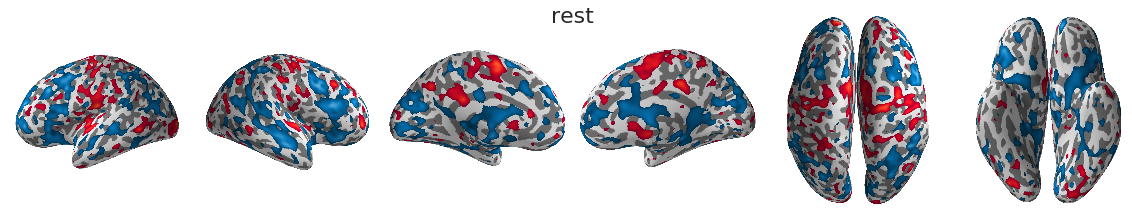

mri_vol2surf --mov ../outofsample/secret_001_secret.nii.gz --hemi lh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2ssnXEG9.mgz
mri_vol2surf --mov ../outofsample/secret_001_secret.nii.gz --hemi rh --surf white --reg ../data/wrrun000Reg.dat --projfrac-avg 0 1 0.1 --surf-fwhm 8 --o /tmp/pysurfer-v2sutXZU5.mgz


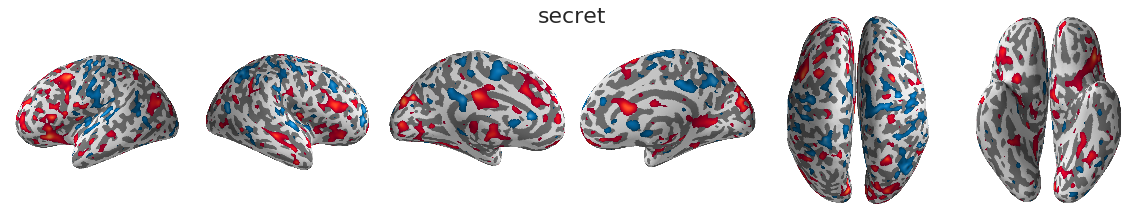

In [39]:
for cond,num,myMin in zip(['rest','secret'],
                      [0,1],
                      [0.05,0.08]):

    thisMap = '../outofsample/%s_00%s_%s.nii.gz'%(cond,num,cond)

    surf_data_lh = project_volume_data(thisMap,'lh', reg_file,smooth_fwhm=8)
    surf_data_rh = project_volume_data(thisMap,'rh', reg_file,smooth_fwhm=8)
    surfDict = {'lh':surf_data_lh,'rh':surf_data_rh}
    
    fig = plt.figure( figsize=(16,3) )

    for i,(h,view,s) in enumerate( zip(['lh','rh','lh','rh'],
                          ['left','right','right','left'],
                          [1000,1000,(1300,1000),(1300,1000)]) ):

        ax = plt.subplot(1,6,i+1)
        b = Brain('dnMniBrain', h, 'inflated.15more',background='white',size=s)
        
        b.add_overlay(surfDict[h], min=myMin, max=0.4, hemi=h)
        b.hide_colorbar()
        
        b.show_view(d[view])
        
        ax.imshow( b.screenshot() ); ax.set_xticks([]);ax.set_yticks([]);


    ################
    ax = plt.subplot(1,6,5)

    b = Brain('dnMniBrain', 'both', 'inflated.15more',background='white',size=1000)
    for h in ['lh','rh']:
        
        b.add_overlay(surfDict[h], min=myMin, max=0.4, hemi=h)
        b.hide_colorbar()

    b.show_view(d['dorsal'])
    ax.imshow( crop(b.screenshot()) ); ax.set_xticks([]);ax.set_yticks([]);

    ################
    ax = plt.subplot(1,6,6)

    b = Brain('dnMniBrain', 'both', 'inflated.15more',background='white',size=(1440,1000))
    for h in ['lh','rh']:
        
        b.add_overlay(surfDict[h], min=myMin, max=0.4, hemi=h)
        b.hide_colorbar()

    b.show_view(d['ventral'])
    ax.imshow(crop(b.screenshot()) ); ax.set_xticks([]);ax.set_yticks([]);

    plt.suptitle(cond,fontsize=22)
    plt.tight_layout()
    
    plt.savefig('../surfFigs/secretInflated15Plot_%s.png'%cond,dpi=300,bbox_inches='tight')

    plt.close()

In [40]:
figList = ['../surfFigs/%s'%x for x in os.listdir('../surfFigs/') if x.startswith('secretInflated15')]
figList

['../surfFigs/secretInflated15Plot_rest.png',
 '../surfFigs/secretInflated15Plot_secret.png']

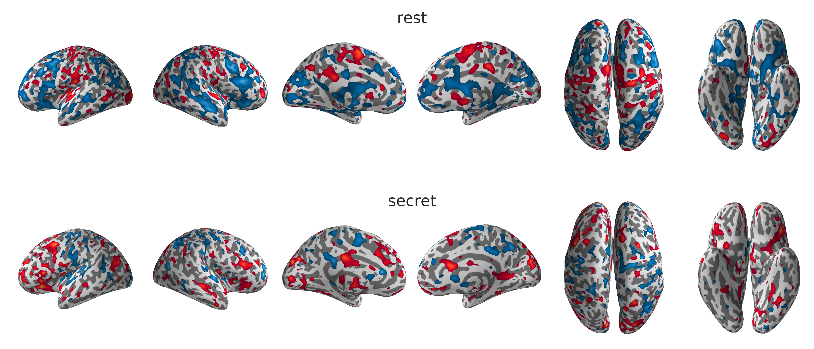

In [41]:
fig = plt.figure(figsize=(16,6))
for i,im in enumerate(figList):
    ax = plt.subplot(2,1,i+1)
    ax.imshow( Image.open(im) )
    ax.set_xticks([]);ax.set_yticks([])
    sns.despine(left=True,bottom=True)
plt.savefig('../figs/secretBrains.png',dpi=600,bbox_inches='tight')
plt.show()